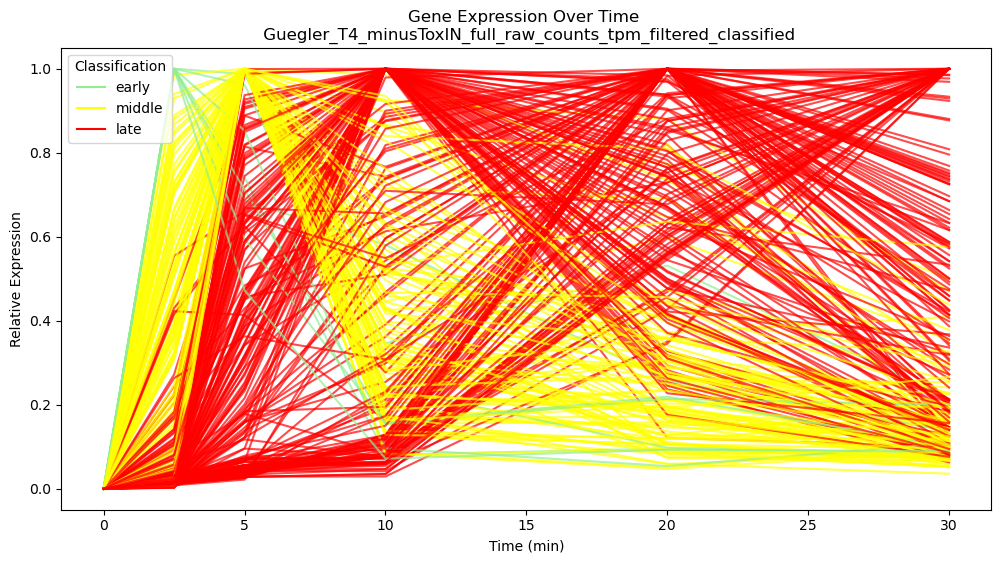

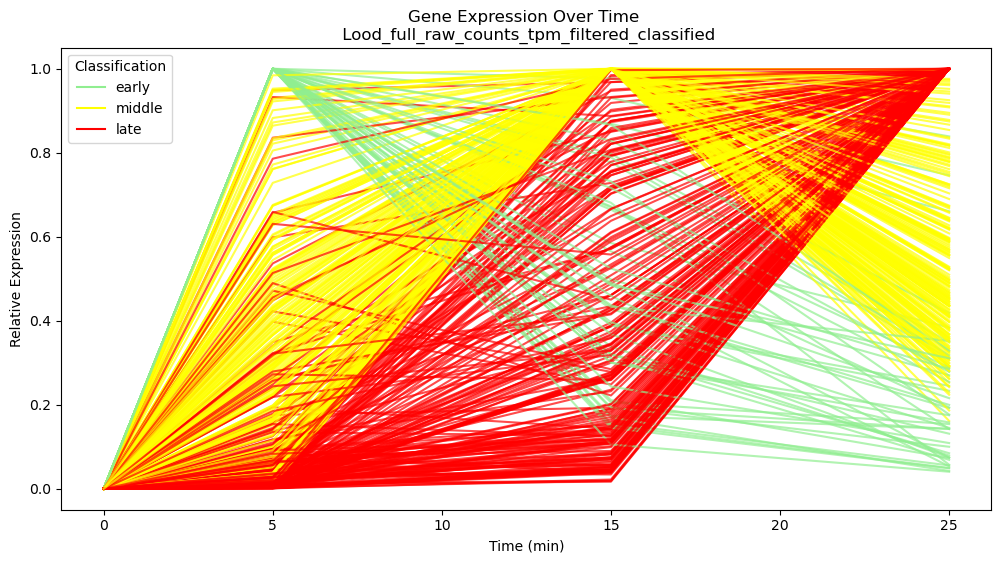

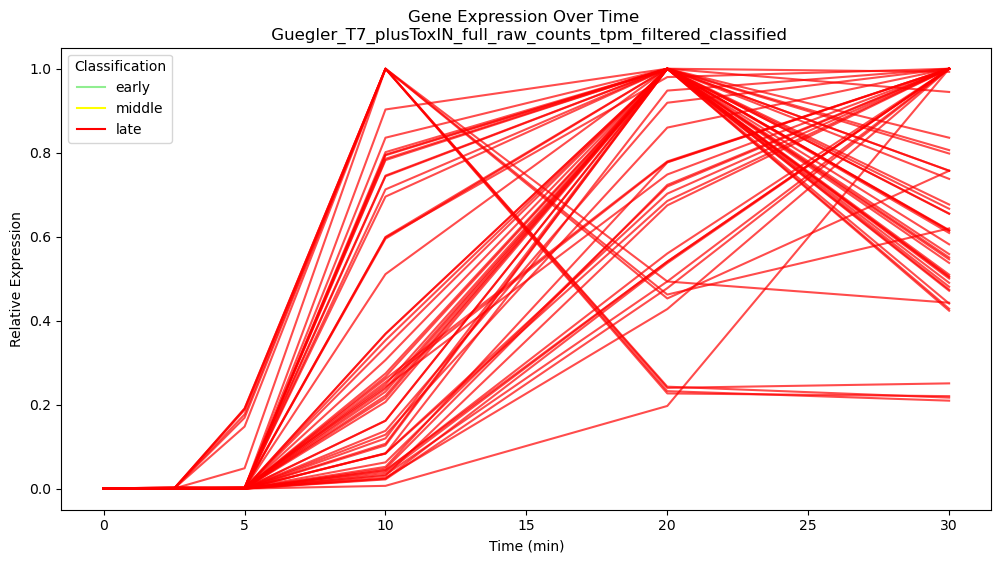

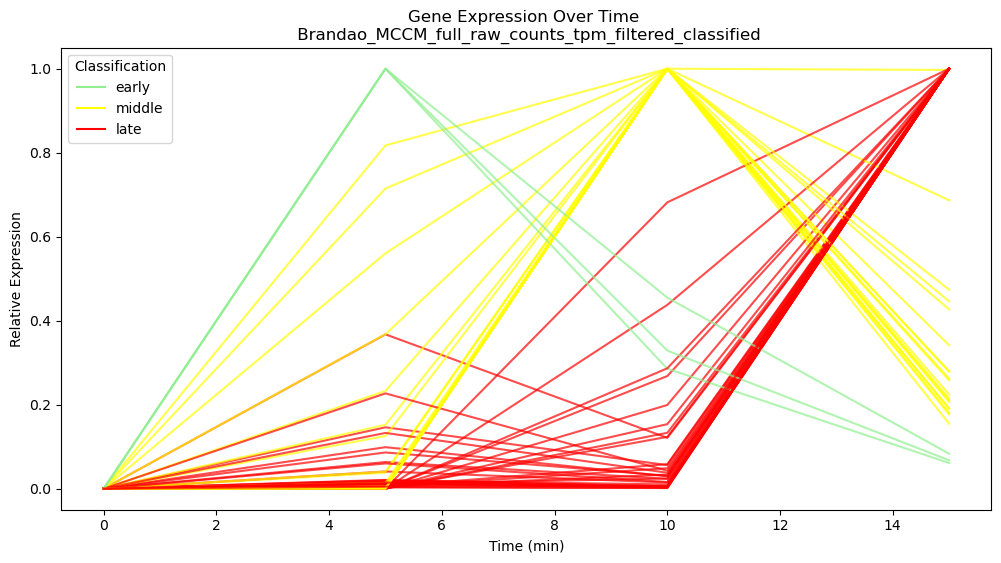

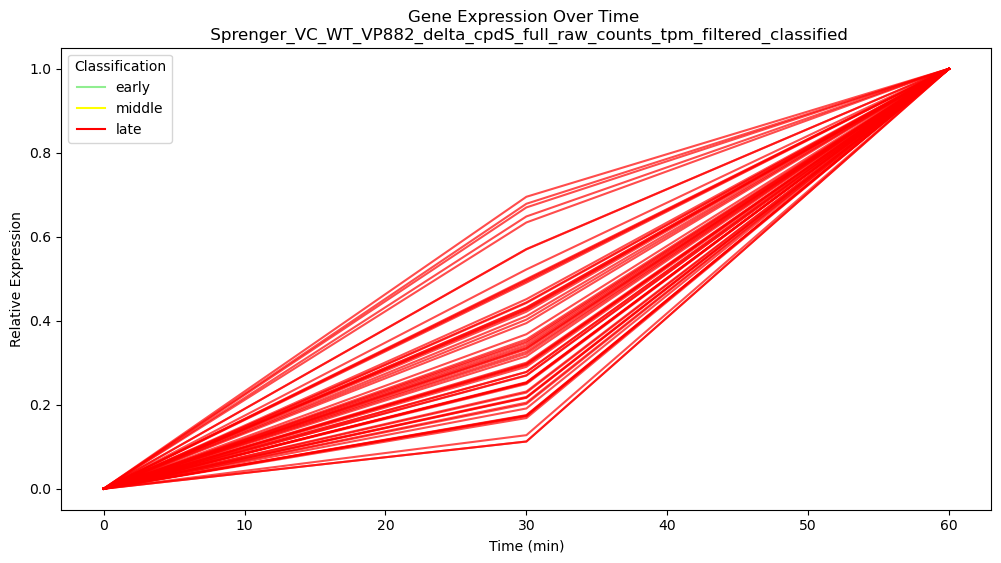

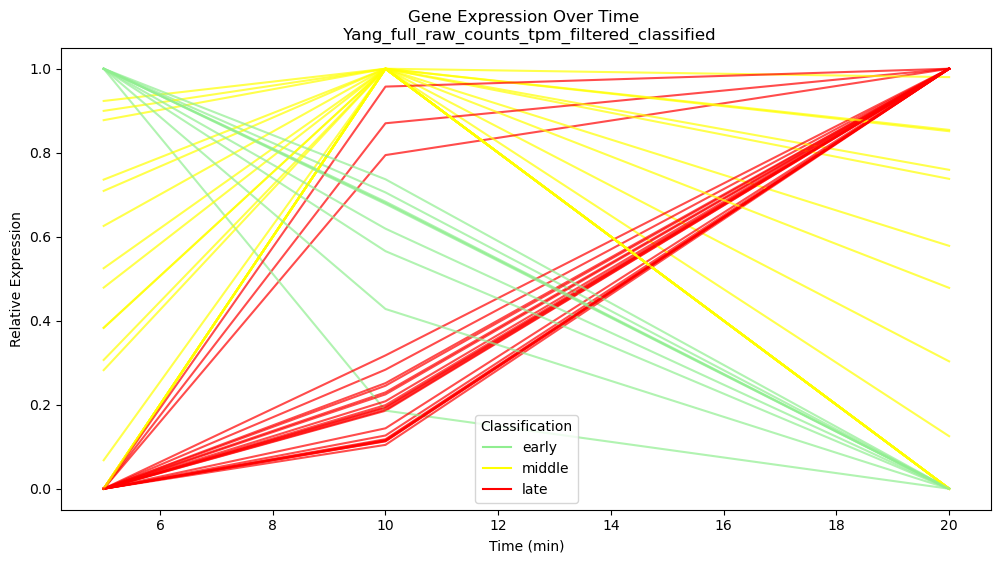

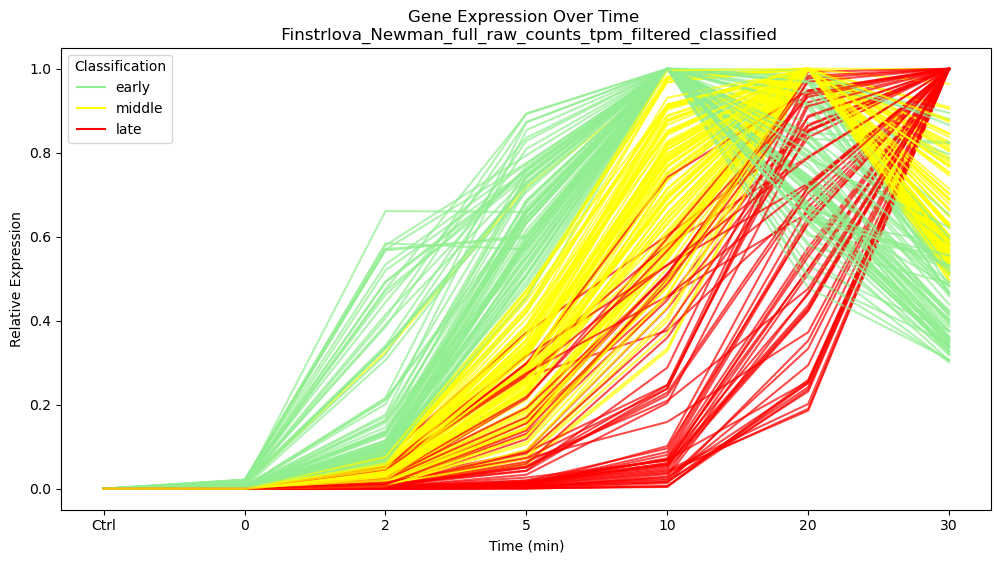

In [69]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt


def plot_expression_over_time(df_temp, dataset_name):
    timepoints = [col[:-2] for col in df_temp.columns if col.endswith("_T")]
    timepoints_T = [col for col in df_temp.columns if col.endswith("_T")]
    try:
        timepoints = list(map(float, timepoints))
    except:  # Exception für dataset Finstrlova
        pass

    df = df_temp.copy()
    df[timepoints_T] = df[timepoints_T].apply(
        lambda row: (row - row.min()) / (row.max() - row.min())
        if row.max() != row.min()
        else 0,
        axis=1,
    )

    colormap = {"early": "lightgreen", "middle": "yellow", "late": "red"}

    plt.figure(figsize=(12, 6))

    for _, row in df.iterrows():
        expression = row[timepoints_T].values
        label = row["classification"]
        color = colormap.get(label)
        plt.plot(timepoints, expression, color=color, alpha=0.7)

    for label, color in colormap.items():
        plt.plot([], [], color=color, label=label)

    plt.xlabel("Time (min)")
    plt.ylabel("Relative Expression")
    plt.title(f"Gene Expression Over Time \n {dataset_name}")
    plt.legend(title="Classification")

    plt.show()


# Daten in dataframes laden
input_path = Path("../data/classified")
for file in input_path.glob("*.tsv"):
    df = pd.read_csv(file, sep="\t")
    df = df.drop(columns=df.columns[1:7])  # Drop unused cols
    plot_expression_over_time(df, file.stem)
